In [177]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
from nltk.corpus import brown, treebank, conll2000

brown_sent = brown.tagged_sents(tagset='universal')
tree_sent = treebank.tagged_sents(tagset='universal')
conll_sent = conll2000.tagged_sents(tagset='universal')
all_sent = brown_sent + tree_sent + conll_sent
pos = [[pos[1] for pos in tup] for tup in all_sent] # store the corresponding pos tag
pos_tokenizer = Tokenizer()
pos_tokenizer.fit_on_texts(pos)
pos_seqs = pos_tokenizer.texts_to_sequences(pos)



In [179]:
def accuracy(preds, labels):
    accuracies = []
    for i in range(len(preds)):
        actual = labels[i]
        predict = preds[i]
        acc = 0
        for j in range(len(predict)):
            try:
                if predict[j] == actual[j]:
                    acc += 1
            except:
                print('Line:', i)
                print('Predict:', len(predict))
                print('Actual:', len(actual))
        if len(preds[i]) > 0:
            acc = acc / len(preds[i])
        accuracies.append(acc)
    return accuracies

In [180]:
f = open('data/data_normal.txt')
lines = f.readlines()
data = []
for line in lines:
    tokens = line.split()
    tokens =  [t.lower() for t in tokens]
    data.append(tokens)

f_out = open('data/labels_normal.txt')
lines_out = f_out.readlines()
labels = []
for line in lines_out:
    tokens = line.split()
    labels.append(tokens)
    
f = open('data/data_garden.txt')
lines = f.readlines()
garden_data = []
for line in lines:
    tokens = line.split()
    tokens =  [t.lower() for t in tokens]
    garden_data.append(tokens)

f_out = open('data/labels_garden.txt')
lines_out = f_out.readlines()
garden_labels = []
for line in lines_out:
    tokens = line.split()
    garden_labels.append(tokens)

In [198]:
max_len = 100

In [199]:
normal_tokenizer = Tokenizer()
garden_tokenizer = Tokenizer()
normal_tokenizer.fit_on_texts(data)
garden_tokenizer.fit_on_texts(garden_data)
normal = normal_tokenizer.texts_to_sequences(data)
garden = garden_tokenizer.texts_to_sequences(garden_data)
normal_pd = pad_sequences(normal, max_len, padding='post', truncating='post')
garden_pd = pad_sequences(garden, max_len, padding='post', truncating='post')

In [200]:
pos_tokenizer = Tokenizer()
pos_tokenizer.fit_on_texts(labels)
pos_tokenizer.fit_on_texts(garden_labels)
normal_pos = pos_tokenizer.texts_to_sequences(labels)
garden_pos = pos_tokenizer.texts_to_sequences(garden_labels)
normal_pos_pd = pad_sequences(normal_pos, max_len, padding='post', truncating='post')
garden_pos_pd = pad_sequences(garden_pos, max_len, padding='post', truncating='post')
normal_pos_pd = to_categorical(normal_pos_pd, num_classes=13)
garden_pos_pd = to_categorical(garden_pos_pd, num_classes=13)

In [195]:
lr01_pd10 = load_model('lstm_lr0.1_bs128_p10_e20_sgd.h5')
lr001_pd10 = load_model('lstm_lr0.01_bs128_p10_e20_sgd.h5')
lr0001_pd10 = load_model('lstm_lr0.001_bs128_p10_e20_sgd.h5')

In [185]:
lr01_pd10_res = lr01_pd10.evaluate(normal_pd, normal_pos_pd)
lr001_pd10_res = lr001_pd10.evaluate(normal_pd, normal_pos_pd)
lr0001_pd10_res = lr0001_pd10.evaluate(normal_pd, normal_pos_pd)

1/1 [==============================] - 0s 378ms/step - loss: 2.2415 - accuracy: 0.1773


In [197]:
lr01_pd10_resGarden = lr01_pd10.evaluate(garden_pd, garden_pos_pd)
lr001_pd10_resGarden = lr001_pd10.evaluate(garden_pd, garden_pos_pd)
lr0001_pd10_resGarden = lr0001_pd10.evaluate(garden_pd, garden_pos_pd)

1/1 [==============================] - 0s 340ms/step - loss: 2.2206 - accuracy: 0.2000


In [196]:
lr01_pd50 = load_model('lstm_lr0.1_bs128_p50_e20_sgd.h5')
lr001_pd50 = load_model('lstm_lr0.01_bs128_p50_e20_sgd.h5')
lr0001_pd50 = load_model('lstm_lr0.001_bs128_p50_e20_sgd.h5')

In [190]:
lr01_pd50_res = lr01_pd50.evaluate(normal_pd, normal_pos_pd)
lr001_pd50_res = lr001_pd50.evaluate(normal_pd, normal_pos_pd)
lr0001_pd50_res = lr0001_pd50.evaluate(normal_pd, normal_pos_pd)

1/1 [==============================] - 0s 355ms/step - loss: 0.4920 - accuracy: 0.8818


In [191]:
lr01_pd50_resGarden = lr01_pd50.evaluate(garden_pd, garden_pos_pd)
lr001_pd50_resGarden = lr001_pd50.evaluate(garden_pd, garden_pos_pd)
lr0001_pd50_resGarden = lr0001_pd50.evaluate(garden_pd, garden_pos_pd)

1/1 [==============================] - 0s 25ms/step - loss: 0.5062 - accuracy: 0.8781


In [201]:
lr01_pd100 = load_model('lstm_lr0.1_bs128_p100_e20_sgd.h5')
lr001_pd100 = load_model('lstm_lr0.01_bs128_p100_e20_sgd.h5')
lr0001_pd100 = load_model('lstm_lr0.001_bs128_p100_e20_sgd.h5')

In [202]:
lr01_pd100_res = lr01_pd100.evaluate(normal_pd, normal_pos_pd)
lr001_pd100_res = lr001_pd100.evaluate(normal_pd, normal_pos_pd)
lr0001_pd100_res = lr0001_pd100.evaluate(normal_pd, normal_pos_pd)

1/1 [==============================] - 0s 345ms/step - loss: 0.2543 - accuracy: 0.9323


In [203]:
lr01_pd100_resGarden = lr01_pd100.evaluate(garden_pd, garden_pos_pd)
lr001_pd100_resGarden = lr001_pd100.evaluate(garden_pd, garden_pos_pd)
lr0001_pd100_resGarden = lr0001_pd100.evaluate(garden_pd, garden_pos_pd)

1/1 [==============================] - 0s 31ms/step - loss: 0.2624 - accuracy: 0.9310


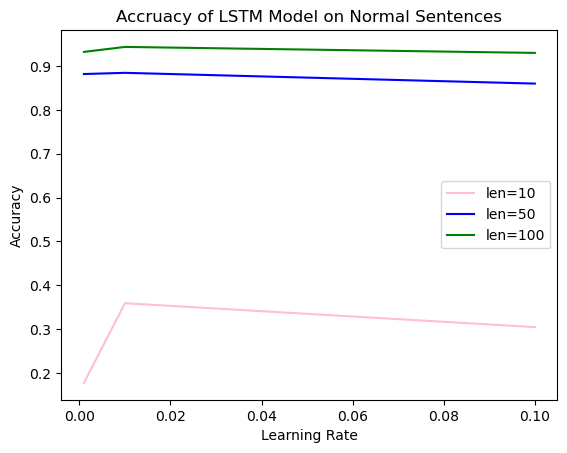

In [244]:
padding = [10, 50, 100]
learningRate = [0.1, 0.01, 0.001]

y10 = [lr01_pd10_res[1], lr001_pd10_res[1], lr0001_pd10_res[1]]
y50 = [lr01_pd50_res[1], lr001_pd50_res[1], lr0001_pd50_res[1]]
y100 = [lr01_pd100_res[1], lr001_pd100_res[1], lr0001_pd100_res[1]]

plt.plot(learningRate, y10, color='pink', label='len=10')
plt.plot(learningRate, y50, color='blue', label='len=50')
plt.plot(learningRate, y100, color='green', label='len=100')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.title('Accruacy of LSTM Model on Normal Sentences')

plt.legend()

plt.show()


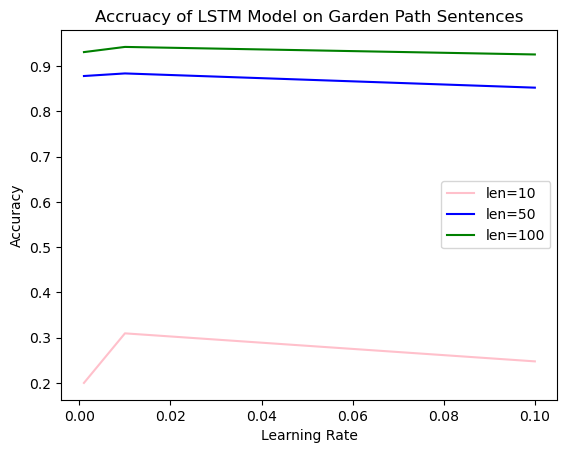

In [245]:
padding = [10, 50, 100]
learningRate = [0.1, 0.01, 0.001]

y10 = [lr01_pd10_resGarden[1], lr001_pd10_resGarden[1], lr0001_pd10_resGarden[1]]
y50 = [lr01_pd50_resGarden[1], lr001_pd50_resGarden[1], lr0001_pd50_resGarden[1]]
y100 = [lr01_pd100_resGarden[1], lr001_pd100_resGarden[1], lr0001_pd100_resGarden[1]]

plt.plot(learningRate, y10, color='pink', label='len=10')
plt.plot(learningRate, y50, color='blue', label='len=50')
plt.plot(learningRate, y100, color='green', label='len=100')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.title('Accruacy of LSTM Model on Garden Path Sentences')

plt.legend()

plt.show()


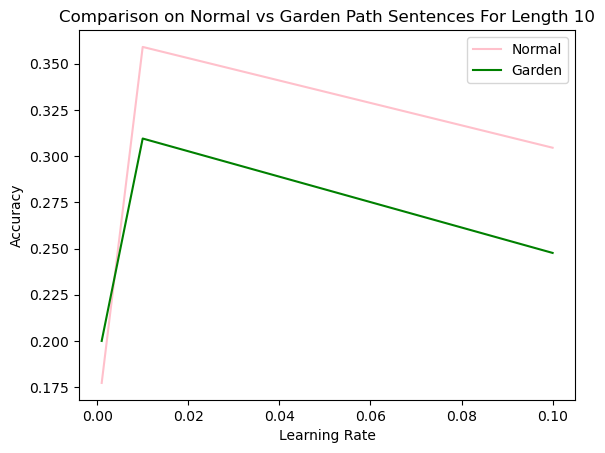

In [249]:
padding = [10, 50, 100]
learningRate = [0.1, 0.01, 0.001]

# fig, ax = plt.subplots(3)

y10 = [lr01_pd10_res[1], lr001_pd10_res[1], lr0001_pd10_res[1]]
plt.plot(learningRate, y10, color='pink', label='Normal')

y10Garden = [lr01_pd10_resGarden[1], lr001_pd10_resGarden[1], lr0001_pd10_resGarden[1]]
plt.plot(learningRate, y10Garden, color='green', label='Garden')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()


plt.title('Comparison on Normal vs Garden Path Sentences For Length 10')

# fig.tight_layout(pad=2.0)



plt.show()

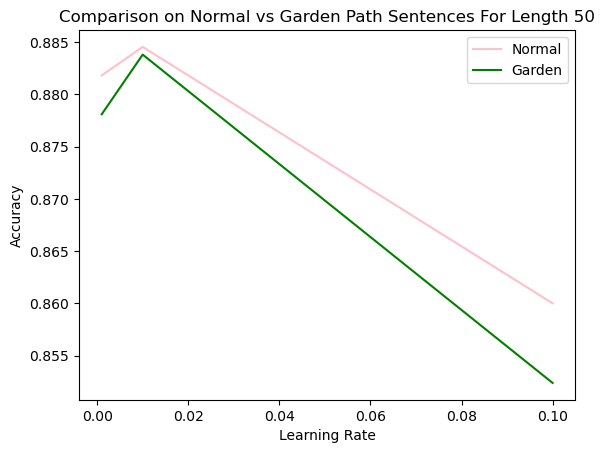

In [250]:
y50 = [lr01_pd50_res[1], lr001_pd50_res[1], lr0001_pd50_res[1]]
plt.plot(learningRate, y50, color='pink', label='Normal')

y50Garden = [lr01_pd50_resGarden[1], lr001_pd50_resGarden[1], lr0001_pd50_resGarden[1]]
plt.plot(learningRate, y50Garden, color='green', label='Garden')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Comparison on Normal vs Garden Path Sentences For Length 50')

plt.show()

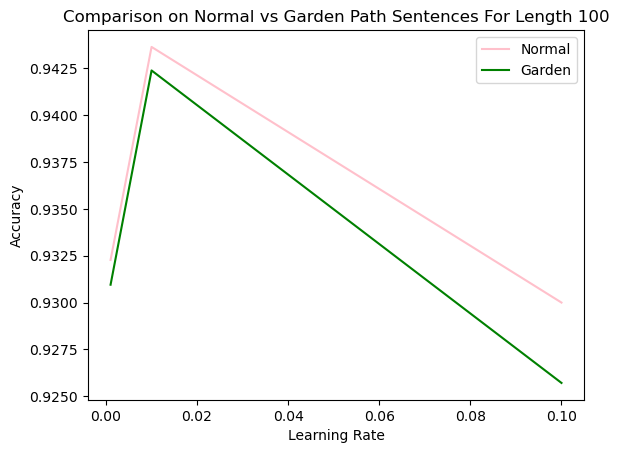

In [251]:
y100 = [lr01_pd100_res[1], lr001_pd100_res[1], lr0001_pd100_res[1]]
plt.plot(learningRate, y100, color='pink', label='Normal')

y100Garden = [lr01_pd100_resGarden[1], lr001_pd100_resGarden[1], lr0001_pd100_resGarden[1]]
plt.plot(learningRate, y100Garden, color='green', label='Garden')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Comparison on Normal vs Garden Path Sentences For Length 100')

plt.show()

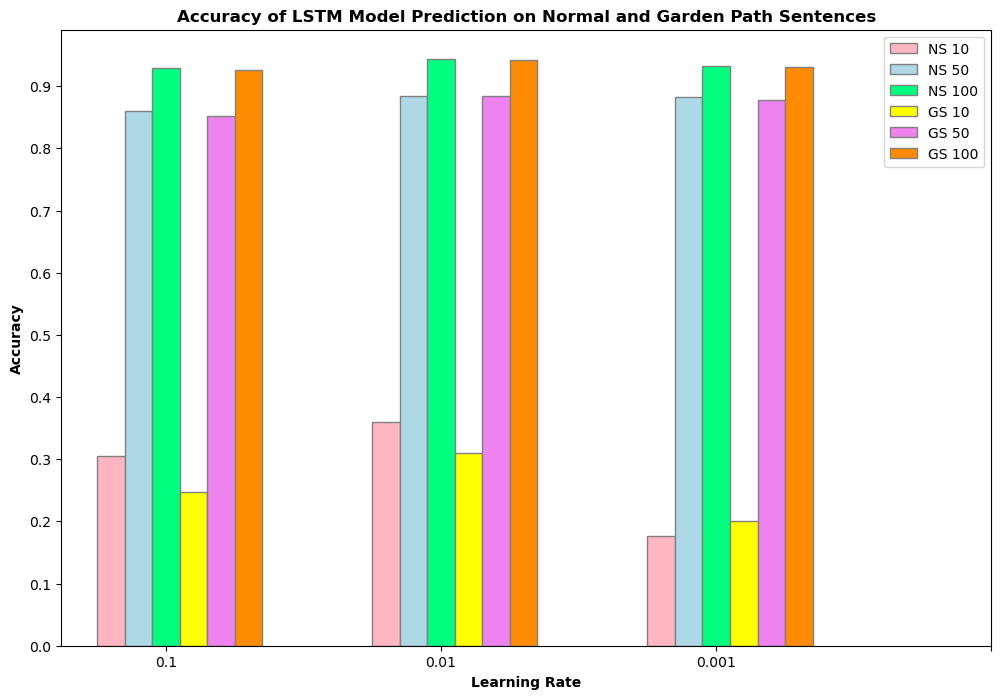

In [268]:
fig = plt.subplots(figsize =(12, 8))
X = np.arange(len(y10))

barWidth = 0.1

plt.bar(X + 0.00, y10, color = 'lightpink', edgecolor ='grey', width = barWidth, label = 'NS 10')
plt.bar(X + 0.1, y50, color = 'lightblue', edgecolor ='grey', width = barWidth, label = 'NS 50')
plt.bar(X + 0.2, y100, color = 'springgreen', edgecolor ='grey', width = barWidth, label = 'NS 100')
plt.bar(X + 0.3, y10Garden, color = 'yellow', edgecolor ='grey', width = barWidth, label = 'GS 10')
plt.bar(X + 0.4, y50Garden, color = 'violet', edgecolor ='grey', width = barWidth, label = 'GS 50')
plt.bar(X + 0.5, y100Garden, color = 'darkorange', edgecolor ='grey', width = barWidth, label = 'GS 100')

plt.xlabel('Learning Rate', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 10)

plt.xticks([r + 0.2 for r in range(len(y10) + 1)],
        ['0.1', '0.01', '0.001', ''])
plt.yticks(np.arange(0, 1, 0.1))

plt.title('Accuracy of LSTM Model Prediction on Normal and Garden Path Sentences', fontweight ='bold', fontsize = 12)

plt.legend()
plt.show()


In [103]:
pred = lr001_bs128.predict(normal_pd) 
pred_vec = np.argmax(pred, axis = 1)
label = np.argmax(normal_pos_pd,axis = 1)
pred_flat, actual_flat = pred_vec.flatten(), label.flatten()
inds = np.where((pred_flat == actual_flat) & (pred_flat != 0))
print(pred_vec[:5]) 
print(label[:5])
print(len(inds[0])/len(pred_flat))

1/1 [==============================] - 0s 32ms/step
[[85  1  6  6  3  4  1  5  5  8  2  1  6]
 [86  1  6  8  1  0  8  1  7  8  7  7  8]
 [82  6  0  0  4  5  6  3  2  0  0  5  0]
 [90  8  2  9  7  0  1  2  4 10  1  8  9]
 [82  2  4  7  1  0  2  1  6  8  7  2  7]]
[[7 2 3 0 6 1 0 0 0 0 0 0 0]
 [8 2 3 0 7 1 0 0 5 0 0 0 0]
 [6 1 2 0 5 0 0 0 0 4 0 0 0]
 [9 1 3 0 8 0 5 6 0 4 0 0 0]
 [8 1 3 0 7 0 5 0 4 0 0 0 0]]
0.04895104895104895


In [170]:
lr05_bs128_p10_e50_sgd = load_model('lstm_lr05_bs128_p10_e50_sgd.h5')

In [176]:
lr05_bs128_p10_e50_sgd.evaluate(normal_pd ,normal_pos_pd)

1/1 [==============================] - 0s 482ms/step - loss: 5.6600 - accuracy: 0.2591


[5.660006523132324, 0.2590909004211426]

In [171]:
pred = lr05_bs128_p10_e50_sgd.predict(normal_pd) 
pred_vec = np.argmax(pred, axis = -1)
label = np.argmax(normal_pos_pd,axis = -1)
pred_flat, actual_flat = pred_vec.flatten(), label.flatten()
inds = np.where((pred_flat == actual_flat) & (pred_flat != 0))
print(pred_vec[:5]) 
print(label[:5])
print(len(inds[0])/len(pred_flat))

1/1 [==============================] - 0s 341ms/step
[[ 5  1  3  4  5  5  3  3  0  0]
 [ 5  4  2 10  3  0  2  5  3  3]
 [ 3  8  8  7  4  5  3  3  3  0]
 [ 5  4  2 11  5  4  1  4  1  1]
 [ 5  4  1  5  2  2  8  3  5  0]]
[[3 5 1 2 3 1 4 0 0 0]
 [3 5 1 2 5 8 2 4 0 0]
 [5 1 2 5 9 4 0 0 0 0]
 [3 1 1 2 9 6 7 1 4 0]
 [3 1 1 2 8 6 1 4 0 0]]
0.05909090909090909


In [172]:
lr05_bs128_p10_e100_sgd = load_model('lstm_lr05_bs128_p10_e100_sgd.h5')

In [173]:
pred = lr05_bs128_p10_e100_sgd.predict(normal_pd) 
pred_vec = np.argmax(pred, axis = -1)
label = np.argmax(normal_pos_pd,axis = -1)
pred_flat, actual_flat = pred_vec.flatten(), label.flatten()
inds = np.where((pred_flat == actual_flat) & (pred_flat != 0))
print(pred_vec[:5]) 
print(label[:5])
print(len(inds[0])/len(pred_flat))

1/1 [==============================] - 0s 337ms/step
[[5 1 3 4 5 1 3 3 3 0]
 [5 4 2 5 3 0 2 5 3 0]
 [3 8 8 7 4 5 3 3 0 0]
 [5 4 1 3 5 4 1 4 1 3]
 [5 4 1 5 2 2 8 3 3 0]]
[[3 5 1 2 3 1 4 0 0 0]
 [3 5 1 2 5 8 2 4 0 0]
 [5 1 2 5 9 4 0 0 0 0]
 [3 1 1 2 9 6 7 1 4 0]
 [3 1 1 2 8 6 1 4 0 0]]
0.06818181818181818


In [169]:
all_posttags = []
for p in pred:
    predseq = [np.argmax(pred, axis=-1) for pred in p]
    pred_tags = [pos_tokenizer.sequences_to_texts([[i]])[0].upper() for i in predseq]
#     for i in predseq:
#         pred_tags.append(pos_tokenizer.index_word[i])
    all_posttags.append(pred_tags)
print(all_posttags)

[['ADJ', 'NOUN', 'DET', '.', 'ADJ', 'ADJ', 'DET', 'DET', 'DET', 'DET'], ['ADJ', '.', 'VERB', 'ADJ', 'DET', 'DET', 'VERB', 'ADJ', 'DET', 'DET'], ['DET', 'PRT', 'PRT', '.', '.', 'ADJ', 'DET', 'DET', 'DET', 'DET'], ['ADJ', '.', 'VERB', 'DET', 'ADJ', '.', 'NOUN', '.', 'NOUN', 'DET'], ['ADJ', '.', 'CONJ', 'ADJ', 'VERB', 'VERB', 'PRT', 'DET', 'DET', 'DET'], ['ADV', 'ADV', 'ADJ', 'VERB', 'VERBS', 'PRON', 'ADJ', 'DET', 'DET', 'DET'], ['ADJ', 'NOUN', 'DET', 'PRT', 'ADJ', 'ADJ', 'NOUN', 'DET', 'DET', 'DET'], ['ADJ', 'NOUN', 'VERB', 'VERB', 'CONJ', 'VERB', 'PRT', 'DET', 'DET', ''], ['ADJ', 'VERB', 'VERBS', 'ADJ', 'ADJ', 'VERB', 'VERBS', 'DET', '', ''], ['ADJ', 'NOUN', 'ADJ', 'PRT', 'PRT', 'DET', 'DET', 'DET', '', ''], ['VERBS', 'VERB', 'PRT', 'PRON', 'ADJ', 'PRT', 'DET', 'DET', '', ''], ['DET', 'PRON', 'PRT', '.', 'ADP', 'DET', 'DET', '', '', ''], ['ADJ', 'PRON', 'VERBS', 'VERBS', 'ADJ', 'DET', 'DET', 'DET', 'DET', ''], ['ADJ', 'NOUN', 'ADJ', 'DET', '.', 'ADJ', 'DET', '', '', ''], ['ADJ', 'PRON',

In [25]:
pred = lr001_bs128.predict(normal_pd) 
pred = np.argmax(pred, axis = -1)[:5] 
label = np.argmax(normal_pos_pd,axis = 1)[:5] 

print(pred) 
print(label)

1/1 [==============================] - 1s 638ms/step
[[85  1  6  6  3  4  1  5  5  8  2  1  6]
 [86  1  6  8  1  0  8  1  7  8  7  7  8]
 [82  6  0  0  4  5  6  3  2  0  0  5  0]
 [90  8  2  9  7  0  1  2  4 10  1  8  9]
 [82  2  4  7  1  0  2  1  6  8  7  2  7]]
[[7 2 3 0 6 1 0 0 0 0 0 0 0]
 [8 2 3 0 7 1 0 0 5 0 0 0 0]
 [6 1 2 0 5 0 0 0 0 4 0 0 0]
 [9 1 3 0 8 0 5 6 0 4 0 0 0]
 [8 1 3 0 7 0 5 0 4 0 0 0 0]]


In [115]:
normal_pred_lr01_bs64 = lr01_bs64.predict(normal_padded)
garden_pred_lr01_bs64 = lr01_bs64.predict(garden_padded)
normal_pred_lr01_bs128 = lr01_bs128.predict(normal_padded)
garden_pred_lr01_bs128 = lr01_bs128.predict(garden_padded)
normal_pred_lr001_bs64 = lr001_bs64.predict(normal_padded)
garden_pred_lr001_bs64 = lr001_bs64.predict(garden_padded)
normal_pred_lr001_bs128 = lr001_bs128.predict(normal_padded)
garden_pred_lr001_bs128 = lr001_bs128.predict(garden_padded)

1/1 [==============================] - 0s 28ms/step


In [11]:
all_posttags = []
for p in lr001_bs128_p10_p5:
    predseq = [np.argmax(pred) for pred in p]
#     pred_tags = [pos_tokenizer.sequences_to_texts([[i]])[0].upper() for i in predseq]
    pred_tags = []
    for i in predseq:
        if i != 0:
            pred_tags.append(pos_tokenizer.index_word[i].upper())
    all_posttags.append(pred_tags)
print(all_posttags)

TypeError: 'Sequential' object is not iterable

In [59]:
pos_tokenizer.index_word

{1: 'noun',
 2: 'verb',
 3: '.',
 4: 'adp',
 5: 'det',
 6: 'adj',
 7: 'adv',
 8: 'pron',
 9: 'conj',
 10: 'prt',
 11: 'num',
 12: 'x'}

In [126]:
with open('data/labels_normal.txt') as f:
    pos_lines = f.readlines()
normal_pos = [labels.split() for labels in pos_lines]
# normal_pos = [[pos[1] for pos in tup] for tup in brown_sent]
# print(accuracy(all_posttags, normal_pos))

In [ ]:
# Accuracy of all the models
lr10_bs128_p10_d02_e50_sgd = 0.045454545454545456
lr001_bs128 = 0.04895104895104895
lr5_bs128_p10_e50_sgd = 0.05909090909090909
lr1_bs128_p10_e50_sgd = 0.06818181818181818
lr001_bs128_p20 = 0.06818181818181818
lr1_bs128_p10_d02_e50_sgd = 0.06818181818181818
lr05_bs128_p10_d02_sgd = 0.06818181818181818
lr1_bs128_p10_d05_sgd = 0.1409090909090909
lr05_bs128_p10_d05_sgd = 0.15454545454545454
lr001_bs128_p10_d05_sgd = 0.15454545454545454
lr001_bs128_p10_e50_sgd = 0.17272727272727273
lr001_bs128_p10_sgd = 0.17727272727272728
lr001_bs128_p10_d02_sgd = 0.17727272727272728
lr001_bs128_p10_d02_e50_sgd = 0.17727272727272728
lr001_bs128_p10_e20_sgd = 0.18181818181818182

In [ ]:
# todo: increase learning rate, increase epoch